In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df["Insulin"].value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: count, Length: 186, dtype: int64

In [7]:
df["BloodPressure"].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
columns_to_check=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
for col in columns_to_check:
    zero_count=(df[col]==0).sum()
    zero_percentage=100*zero_count/len(df)
    print(f"{col}: {zero_count} (%{zero_percentage:.2f})")

Glucose: 5 (%0.65)
BloodPressure: 35 (%4.56)
SkinThickness: 227 (%29.56)
Insulin: 374 (%48.70)
BMI: 11 (%1.43)


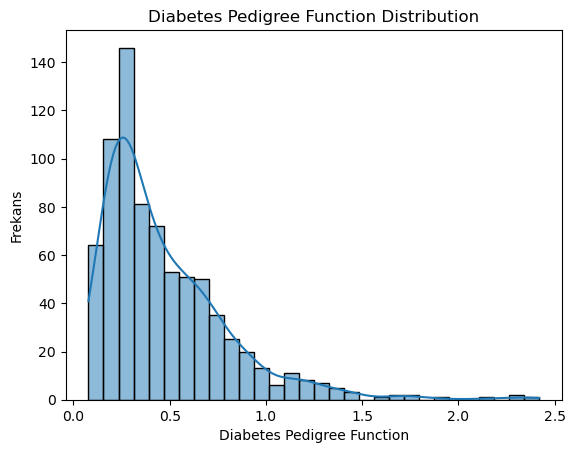

In [10]:
sns.histplot(df['DiabetesPedigreeFunction'], bins=30, kde=True)
plt.title('Diabetes Pedigree Function Distribution')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frekans')
plt.show()

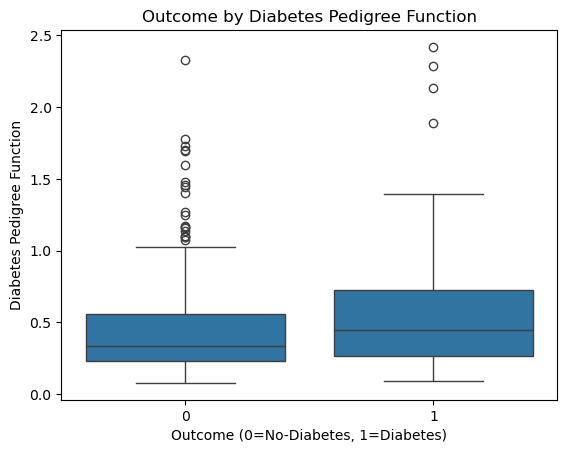

In [11]:
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.title('Outcome by Diabetes Pedigree Function')
plt.xlabel('Outcome (0=No-Diabetes, 1=Diabetes)')
plt.ylabel('Diabetes Pedigree Function')
plt.show()

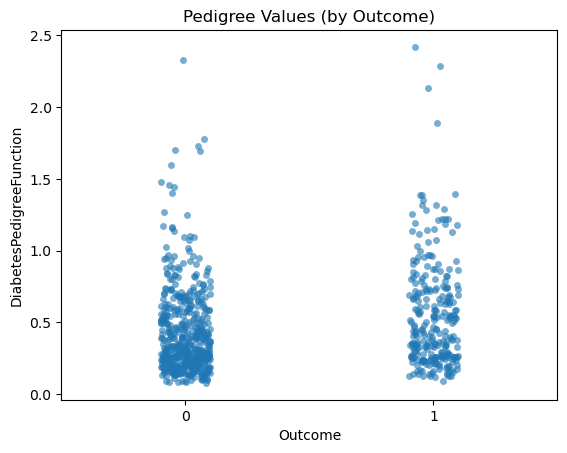

In [12]:
sns.stripplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, jitter=True, alpha=0.6)
plt.title('Pedigree Values (by Outcome)')
plt.show()

In [13]:
X=df.drop("Outcome", axis=1)
y=df["Outcome"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15)

In [15]:
columns_to_fill = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [16]:
medians = {}
for col in columns_to_fill:
    median_value = X_train[X_train[col] != 0][col].median()
    medians[col] = median_value
    X_train[col] = X_train[col].replace(0, median_value)

for col in columns_to_fill:
    X_test[col] = X_test[col].replace(0, medians[col])

In [17]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.907166,121.560261,72.612378,29.040717,142.477199,32.448208,0.469948,33.285016
std,3.385438,29.974412,12.165642,8.312217,80.879330,6.862948,0.328516,11.678337
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.084000,21.000000
25%,1.000000,100.000000,64.000000,25.000000,125.000000,27.600000,0.238250,24.000000
50%,3.000000,117.000000,72.000000,29.000000,129.500000,32.300000,0.370500,29.000000
75%,6.000000,139.750000,80.000000,32.000000,130.000000,36.500000,0.630750,40.000000
max,17.000000,199.000000,122.000000,63.000000,680.000000,67.100000,2.420000,81.000000


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [21]:
adaboost_param = {
        "n_estimators" : [50, 70, 100, 120, 150, 200],
        "learning_rate" : [0.001, 0.01, 0.1, 1, 10]
}

In [22]:
grid = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = adaboost_param, cv = 5, verbose = 1, n_jobs = -1)

In [23]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 100, 120, 150, 200]},
             verbose=1)

In [24]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

In [25]:
ada = AdaBoostClassifier(learning_rate=0.1, n_estimators=150)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       108
           1       0.57      0.59      0.58        46

    accuracy                           0.75       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.75      0.75      0.75       154

0.7467532467532467
[[88 20]
 [19 27]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
